# **Network Dynamics: Homework 1**
## Andrea Silvi (s290312), Politecnico di Torino
## andrea.silvi@studenti.polito.it

**Note**: I have shared ideas of how to solve this homework with classmates Rizzardi Andrea (s287396), Tatti Fabio (s282383), Turco Maria Francesca (s278427).






In [ ]:
import networkx as nx
import scipy.misc 
from scipy import io
import numpy as np
import cvxpy as cp

# **Exercise 1**

**Point b)**

We add capacities and check the results obtained by hand.

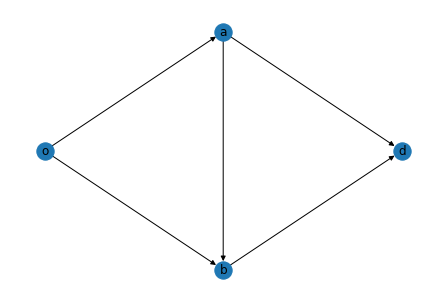

In [ ]:
GG = nx.DiGraph()
GG.add_edge("o", "a", capacity=3.0)
GG.add_edge("o", "b", capacity=2.0)
GG.add_edge("a", "b", capacity=2.0)
GG.add_edge("a", "d", capacity=3.0)
GG.add_edge("b", "d", capacity=2.0)

pos = {'o': [0, 2], 'a': [1, 3], 'b': [1, 1], 'd': [2, 2]}
nx.draw(GG, pos, with_labels=True)

In [ ]:
cut_value, partition = nx.minimum_cut(GG, "o", "d")
print(f'the minimum (o-d) cut capacity is {cut_value}, with nodes partition {partition}')

the minimum (o-d) cut capacity is 5.0, with nodes partition ({'b', 'o', 'a'}, {'d'})


We check that there is no way to increase from 5 the minimum o-d cut capacity.

In [ ]:
previous_cut_value = 5 #calculated at the previous step.
for u,v in GG.edges():
  GG[u][v]['capacity'] += 1   #add 1 unit to edge (u,v)
  cut_value, partition = nx.minimum_cut(GG, "o", "d")
  if cut_value > previous_cut_value:    #!found a way to get higher minimum cut
    print(f'added to {(u,v)} and to {(x,y)}\n')
    previous_cut_value = cut_value
  GG[u][v]['capacity'] -= 1
print(f'cut value is now {previous_cut_value}')

cut value is now 5


As expected, 1 single unit of capacity cannot change the minimum cut, which stays at 5.

**Point c)**

Now we check our result: there are only 3 ways to reach a higher minimum cut capacity than the previous one.

In [ ]:
for u,v in GG.edges():
  GG[u][v]['capacity'] += 1
  for x, y in GG.edges():
    if (u == 'o' or u < x) and x != 'o':   #simple way to not print duplicate couples of edges.
      GG[x][y]['capacity'] += 1
      cut_value, partition = nx.minimum_cut(GG, "o", "d")
      if cut_value == 6:  #found by hand, here I'm only checking my results.
        print(f'added to {(u,v)} and to {(x,y)}\n')
      elif cut_value >6:  #my calculations would be wrong.
            print(f'Error in calculations! Partition {partition} gives capacity {cut_value}.')
      GG[x][y]['capacity'] -= 1
  GG[u][v]['capacity'] -= 1

added to ('o', 'a') and to ('a', 'd')

added to ('o', 'a') and to ('b', 'd')

added to ('o', 'b') and to ('b', 'd')



**Point d)**

Finally we check that there are only 6 ways to reach 7 as minimum cut capacity by adding 4 units.

In [ ]:
res = []
for u,v in GG.edges():
  GG[u][v]['capacity'] += 1
  for x, y in GG.edges():
      GG[x][y]['capacity'] += 1
      for q, r in GG.edges():
        GG[q][r]['capacity'] += 1
        for k,l in GG.edges():
          GG[k][l]['capacity'] += 1
          cut_value, partition = nx.minimum_cut(GG, "o", "d")
          if cut_value == 7:  #found by hand, here I'm only checking my results.
            if sorted([(u,v), (x,y), (q,r), (k,l)]) not in res: #in order to not have duplicates in res.
              res.append(sorted([(u,v), (x,y), (q,r), (k,l)]))
          elif cut_value >7:  #my calculations would be wrong.
            print(f'Error in calculations! Partition {partition} gives capacity {cut_value}.')
          GG[k][l]['capacity'] -= 1 
        GG[q][r]['capacity']-= 1
      GG[x][y]['capacity'] -= 1
  GG[u][v]['capacity'] -= 1

for edges in res:
  print(f'added edges {edges}\n')
  

added edges [('a', 'd'), ('a', 'd'), ('o', 'a'), ('o', 'a')]

added edges [('a', 'd'), ('b', 'd'), ('o', 'a'), ('o', 'a')]

added edges [('b', 'd'), ('b', 'd'), ('o', 'a'), ('o', 'a')]

added edges [('a', 'd'), ('b', 'd'), ('o', 'a'), ('o', 'b')]

added edges [('b', 'd'), ('b', 'd'), ('o', 'a'), ('o', 'b')]

added edges [('b', 'd'), ('b', 'd'), ('o', 'b'), ('o', 'b')]



# **Exercise 2**

**Point a)**

Green nodes are people, orange nodes are books. 

Edge ($Pi$, $Bj$) represent the interest  of person $P_i$ to book $B_j$.

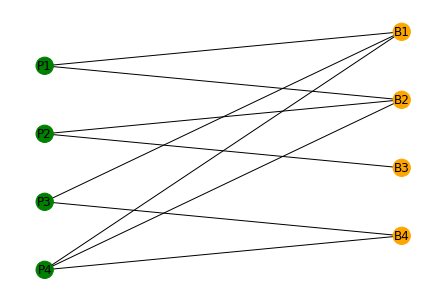

In [ ]:
G = nx.Graph()
G.add_edges_from([('P1','B1'),('P1','B2'),('P2','B2'),('P2','B3'), ('P3', 'B1'),
                  ('P3', 'B4'), ('P4', 'B1'), ('P4', 'B2'), ('P4', 'B4')])
color_map = ['green' if 'P' in node else 'orange' for node in G]  
pos = {'P1':[0,4], 'P2':[0,2], 'P3':[0,0], 'P4':[0,-2], 'B1':[2,5], 'B2': [2, 3],
       'B3': [2, 1], 'B4': [2, -1]}
nx.draw(G, pos, node_color=color_map, with_labels=True)
Simple_G = G.copy()
simple_pos = pos.copy()
simple_colormap = color_map.copy()

**Point b)**

We start by adding a node origin and a node destination which are connected respectively to all the people and all the books.

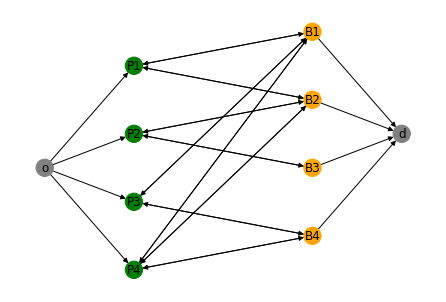

In [ ]:
G = nx.DiGraph(G)
for n in range(4):
  p_n = 'P' + str(n+1)  #person_N
  b_n = 'B' + str(n+1)  #book_N
  G.add_edge('o', p_n)
  G.add_edge(b_n, 'd')

pos['o'] = [-1, 1]
pos['d'] = [3, 2]

for i in range(2):
  color_map.append('grey')   #add black as color of node o and d

nx.draw(G, pos, node_color=color_map, with_labels=True)

We assing capacity of 1 to all edges of the graph.

In order to respect mass conservation on nodesets **P** and **B**, all capacities set at 1 means that a person can take only 1 book (only capacity of 1 between $o$ and $P_i$) and a book can be taken by only 1 person (capacity of 1 between $B_j$ and $d$). 

We then run the maximum_flow algorithm on this graph.

If the maximum flow is equal to the number of people, then there exist a complete matching  for the people. 

Since the number of people is equal to the number of books, then this would also  be a perfect matching.

In [ ]:
for i,j in G.edges():
  G[i][j]['capacity'] = 1
res = nx.maximum_flow(G, "o", "d")
res

(4,
 {'B1': {'P1': 0, 'P3': 0, 'P4': 0, 'd': 1},
  'B2': {'P1': 0, 'P2': 0, 'P4': 0, 'd': 1},
  'B3': {'P2': 0, 'd': 1},
  'B4': {'P3': 0, 'P4': 0, 'd': 1},
  'P1': {'B1': 0, 'B2': 1},
  'P2': {'B2': 0, 'B3': 1},
  'P3': {'B1': 0, 'B4': 1},
  'P4': {'B1': 1, 'B2': 0, 'B4': 0},
  'd': {},
  'o': {'P1': 1, 'P2': 1, 'P3': 1, 'P4': 1}})

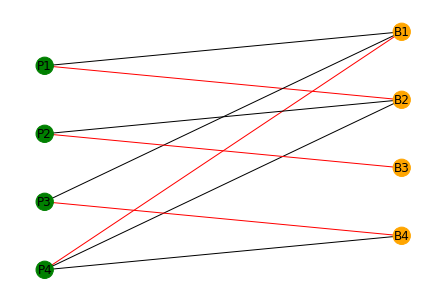

In [ ]:
links = res[1]  #dictionary of the result of nx.maximum_flow
del links['o']  #we want to delete everything except the info of edges btwn people and books, in order to print the edges with flow.
del links['d']
for i in range(4):
  del links['B'+str(i+1)]

colored_edges = set()
for i in range(4):
  person = 'P'+str(i+1)
  for b, v in links[person].items(): #for each person, iterate over dictionary with k = book, v = 1/0 if link present or not
    if v > 0:   #if v>0, means that person (i+1) takes book b
      colored_edges.add((person, b))

colormap = []
for i,j in Simple_G.edges():
  if (i,j) in colored_edges or (j,i) in colored_edges:
    colormap.append('red')    #edges used will be red
  else:
    colormap.append('black')

nx.draw(Simple_G, simple_pos, node_color=simple_colormap, edge_color=colormap, with_labels=True)



**Point c)**

To model multiple copies of a book, we put the capacity of edge ($Book_i$, $d$) as
number of copies of $Book_i$. 

We also put capacity of edge ($o$, $Person_j$) as infinity because people can have all the books they can get. 

We interpret this case as the person can only get 1 copy of the same book, hence the capacity of edge ($Person_j$, $Book_i$) remains 1.

This time, the maximum flow will represent the number of total copies assigned
to people.

In [ ]:
copies = [2, 3, 2, 2]
for i in range(4):
  G['o']['P'+str(i+1)]['capacity'] = np.inf
  G['B'+str(i+1)]['d']['capacity'] = copies[i]

res = nx.maximum_flow(G, "o", "d")
res


(8,
 {'B1': {'P1': 0, 'P3': 0, 'P4': 0, 'd': 2},
  'B2': {'P1': 0, 'P2': 0, 'P4': 0, 'd': 3},
  'B3': {'P2': 0, 'd': 1},
  'B4': {'P3': 0, 'P4': 0, 'd': 2},
  'P1': {'B1': 0, 'B2': 1},
  'P2': {'B2': 1, 'B3': 1},
  'P3': {'B1': 1, 'B4': 1},
  'P4': {'B1': 1, 'B2': 1, 'B4': 1},
  'd': {},
  'o': {'P1': 1, 'P2': 2, 'P3': 2, 'P4': 3}})

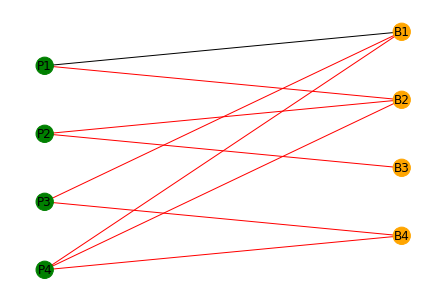

In [ ]:
links = res[1]
del links['o'] #we want to delete everything except the info of edges btwn people and books, in order to print the edges with flow.
del links['d']
for i in range(4):
  del links['B'+str(i+1)]

colored_edges = set()
for i in range(4):
  person = 'P'+str(i+1)
  for b, v in links[person].items(): #for each person, iterate over dictionary with k = book, v = 1/0 if link present or not
    if v > 0:   #if v>0, means that person (i+1) takes book b
      colored_edges.add((person, b))

colormap = []
for i,j in Simple_G.edges():
  if (i,j) in colored_edges or (j,i) in colored_edges:
    colormap.append('red')
  else:
    colormap.append('black')

nx.draw(Simple_G, simple_pos, node_color=simple_colormap, edge_color=colormap, with_labels=True)



**Point d)**

Since the library can sell 1 copy of a book and buy a copy of another one, based on the results of *point c)* and the graph above we can see that $Person_1$ is interested in $Book_1$ but cannot take it, since it has only 2 copies but 3 contenders. 

Instead, $Book_3$ (which the library has 3 copies of), has only 1 person interested in it ($Person_2$). 

Then, the library should sell 1 copy of $Book_3$ and buy another one of $Book_1$.

Below, we can see the results of this.

In [ ]:
new_copies = [3, 3, 1, 2]
for i in range(4):
  G['B'+str(i+1)]['d']['capacity'] = new_copies[i]

res = nx.maximum_flow(G, "o", "d")
res

(9,
 {'B1': {'P1': 0, 'P3': 0, 'P4': 0, 'd': 3},
  'B2': {'P1': 0, 'P2': 0, 'P4': 0, 'd': 3},
  'B3': {'P2': 0, 'd': 1},
  'B4': {'P3': 0, 'P4': 0, 'd': 2},
  'P1': {'B1': 1, 'B2': 1},
  'P2': {'B2': 1, 'B3': 1},
  'P3': {'B1': 1, 'B4': 1},
  'P4': {'B1': 1, 'B2': 1, 'B4': 1},
  'd': {},
  'o': {'P1': 2, 'P2': 2, 'P3': 2, 'P4': 3}})

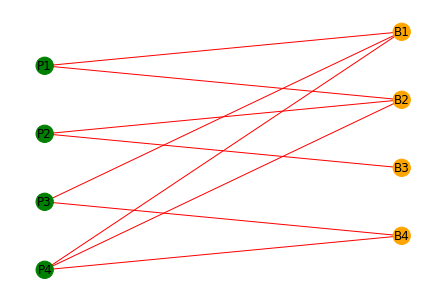

In [ ]:
links = res[1]
del links['o'] #we want to delete everything except the info of edges btwn people and books, in order to print the edges with flow.
del links['d']
for i in range(4):
  del links['B'+str(i+1)]

colored_edges = set()
for i in range(4):
  person = 'P'+str(i+1)
  for b, v in links[person].items(): #for each person, iterate over dictionary with k = book, v = 1/0 if link present or not
    if v > 0:   #if v>0, means that person (i+1) takes book b
      colored_edges.add((person, b))

colormap = []
for i,j in Simple_G.edges():
  if (i,j) in colored_edges or (j,i) in colored_edges:
    colormap.append('red')
  else:
    colormap.append('black')

nx.draw(Simple_G, simple_pos, node_color=simple_colormap, edge_color=colormap, with_labels=True)



# **Exercise 3**

In [ ]:
file = io.loadmat('capacities.mat')
capacities = file.get("capacities")
capacities = capacities.reshape(28,)
file = io.loadmat("traveltime.mat")
traveltime = file.get("traveltime")
traveltime = traveltime.reshape(28,)
file = io.loadmat("flow.mat")
flow = file.get("flow")
flow = flow.reshape(28,)
file = io.loadmat("traffic.mat")
traffic = file.get("traffic")

In [ ]:
traveltime

array([0.14583 , 0.044833, 0.129   , 0.18667 , 0.12983 , 0.078333,
       0.094   , 0.057333, 0.14167 , 0.10517 , 0.10667 , 0.10483 ,
       0.11233 , 0.1805  , 0.1215  , 0.080667, 0.075333, 0.056667,
       0.032667, 0.035   , 0.066667, 0.11283 , 0.078333, 0.054167,
       0.095833, 0.073   , 0.165   , 0.14867 ])

In [ ]:
capacities

array([ 8741,  9864, 13350, 10926, 13707,  6960,  7422,  6678,  6297,
       11102,  8899,  8970,  9753,  9719,  9083,  7416, 13353, 11216,
       10947, 10019,  8732, 10763,  6677,  9403, 10355,  9067, 11990,
        8258], dtype=uint16)

In [ ]:
flow

array([ 7524,  6537, 11139,  9282,  9282,  6398,  6728,  5988,  5951,
        9557,  7423,  7423,  6814,  8536,  7652,  6537, 11924,  9640,
        8161,  8603,  7974,  9446,  5562,  6719,  9455,  6686, 10833,
        7403], dtype=uint16)

In [ ]:
traffic 

array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  

**Point a)**

We firstly define the shortest path problem between node 1 and 7 as a network optimization problem, where the cost function for each link is its length.



In [ ]:
B = traffic #the node-link incidence matrix.
n_edges = len(traveltime)

In [ ]:
tau = 1
nu = np.zeros(17)
nu[0] = 1
nu[-1] = -1
nu = nu * tau # exogenous flow vector.

# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.

l = traveltime # the traveltime

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ f)  #cost function to minimize.
constraints = [B @ f == nu, f >=0]  #constraints.
prob = cp.Problem(objective, constraints)

result = prob.solve()   #optimal objective value.

opt_flow = f.value    #optimal value of f.
rounded_opt_flow = [round(v) for v in opt_flow] #we are interested if it's taken or not (1/0).
print("Optimal f:", rounded_opt_flow)

Optimal f: [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
print("Optimal path from 1 to 17:\n")
res = []
for j in range(B.shape[1]):
  for i in range(B.shape[0]):
    if B[i][j] == 1:
      u = i+1
    elif B[i][j] == -1:
      v = i+1
  if rounded_opt_flow[j] == 1:    
    res.append((u,v))
print(sorted(res))

Optimal path from 1 to 17:

[(1, 2), (2, 3), (3, 9), (9, 13), (13, 17)]


**Point b)**

We then find the maximum flow between node 1 and 17. For this we define the graph of the network and we frame the problem as an optimization problem where our objective is to maximize tau over the network. We also check the result with the max flow min cut theorem.

In [ ]:
G = nx.DiGraph()

for j in range(B.shape[1]): #iterate over links
  for i in range(B.shape[0]): #iterate over nodes
    if B[i][j] == 1:  #then node i+1 is the tail of link j
      u = i+1
    elif B[i][j] == -1: #then node i+1 is the head of link j
      v = i+1
  G.add_edge(u, v, capacity = capacities[j]) #assign to the j-th link the j-th capacity

In [ ]:
tau = cp.Variable(1)    #the variable to be maximized
f = cp.Variable(n_edges)  #vector variable

nu = np.zeros(B.shape[0])  #maximum flow between 1 and 17, so exogenous flow will be    
nu[0] = 1               #tau entering in 1 and -tau exiting in 17
nu[-1] = -1

objective = cp.Maximize(tau)
constraints = [tau>=0, f>=0, f<=capacities, B @ f == tau*nu]

prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.

print("Optimal tau:", round(tau.value[0]))

Optimal tau: 22448


In [ ]:
nx.maximum_flow(G, 1, 17)


(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {12: 7068, 13: 6297},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  12: {13: 7893},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  15: {16: 8258},
  16: {17: 8258},
  17: {}})

**Point c)**

In [ ]:
nu_real = B@flow    #the actual exogenous flow vector.

In [ ]:
nu_real

array([ 16806,   8570,  19448,   4957,   -746,   4768,    413,     -2,
        -5671,   1169,     -5,  -7131,   -380,  -7412,  -7810,  -3430,
       -23544], dtype=int32)

In [ ]:
nu = np.zeros(B.shape[0])
nu[0] = nu_real[0]
nu[-1] = -nu_real[0]
nu    #we simplify nu in order to have a single origin single destination problem.

array([ 16806.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0., -16806.])

**Point d)**

We then find the social optimum flow $f^*$ by implementing a network optimization problem where the cost function of each link $e$ is $f_ed_e(f_e) =\frac{l_eC_e}{1-f_e/C_e} - l_eC_e$.

Note that in the constraints, other than the mass conservation and non-negativity of the flow, we put that $f_e$ cannot be higher than $C_e-1$, since the delay function $d_e(f_e=C_e) = \infty$ and the flow on link $e$ represents the number of cars, which has to be an integer.

In [ ]:
l = traveltime 

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(((cp.inv_pos(np.ones(n_edges)-(f/capacities))).T@(l*capacities))-l.T@capacities) #the cost function defined above.
constraints = [B @ f == nu, f >=0, f <= (capacities-1)]
prob = cp.Problem(objective, constraints)

result = prob.solve()
opt_flow = f.value
rounded_opt_flow = [round(v) for v in opt_flow]
print("Optimal f:", rounded_opt_flow)

Optimal f: [6642, 6059, 3132, 3132, 10164, 4638, 3006, 2543, 3132, 583, 0, 2927, 0, 3132, 5525, 2854, 4886, 2215, 464, 2338, 3318, 5656, 2373, 0, 6414, 5505, 4886, 4886]


In [ ]:
print("Optimal flow cost:", result)

Optimal flow cost: 25943.61566052671


**Point e)**

We now find the Wardrop equilibrium $f^{(0)}$, by using the cost function on each link $e$ $\int_0^{f_e}d_e(s)ds$, with $d_e(f_e) = \frac{l_e}{1-f_e/C_e}$.

In [ ]:
objective = cp.Minimize((capacities*l).T @ (cp.log(capacities) - cp.log(capacities-f)) ) #the result of the sum of the costs.
prob = cp.Problem(objective, constraints)
w_result = prob.solve()
wardrop_flow = f.value
rounded_wardrop_flow = [round(v) for v in wardrop_flow]
print("Wardrop f:", rounded_wardrop_flow)

Wardrop f: [6716, 6716, 2367, 2367, 10090, 4645, 2804, 2284, 3418, 0, 177, 4171, 0, 2367, 5445, 2353, 4933, 1842, 697, 3036, 3050, 6087, 2587, 0, 6919, 4954, 4933, 4933]


In [ ]:
def cost(f, l, c):    #function that calculates the social optimum cost.
  return np.sum(((l*c)/(np.ones(len(f))- f/c)) - l*c)


wardrop_cost = cost(f = wardrop_flow, l=traveltime, c=capacities)
print("Wardrop cost:", wardrop_cost)

Wardrop cost: 26292.96256960744


In [ ]:
optimal_cost = cost(f = opt_flow, l=traveltime, c=capacities)
print("Social optimum cost:", optimal_cost)

Social optimum cost: 25943.622068139466


In [ ]:
PoA = wardrop_cost/optimal_cost

print("The price of anarchy:", PoA)

The price of anarchy: 1.0134653712018489


**Point e')**

We now introduce tolls in order to make the Wardrop equilibrium coincide with the social optimum. We define a toll on link $e$ as $ω_e = f_e^*d_e^\prime(f_e^*)$.

In [ ]:
omegas = ((traveltime*(capacities) / (capacities - opt_flow)**2))* opt_flow #tolls defined as the derivative of the delay computed at
                                                                            #social optimum times the social optimum.

In [ ]:
omegas

array([1.92257248e+00, 1.85064919e-01, 5.16705621e-02, 1.05178880e-01,
       1.44051984e+00, 4.69173917e-01, 1.07572598e-01, 5.69227494e-02,
       2.78798925e-01, 6.15757825e-03, 4.25031061e-08, 7.53475592e-02,
       4.96687145e-09, 1.26661488e-01, 4.81719021e-01, 8.20541383e-02,
       6.85712513e-02, 1.73822035e-02, 1.50914079e-03, 1.38927173e-02,
       6.58990076e-02, 2.63301569e-01, 6.70055755e-02, 2.36521078e-09,
       4.09839635e-01, 2.87277108e-01, 1.91576832e-01, 5.27749722e-01])

In [ ]:
objective = cp.Minimize((capacities*l).T @ (cp.log(capacities) - cp.log(capacities-f)) + omegas.T@f )  #the cost for the wardrop problem is the same as above
                                                                                                       #but with a cost w_e*f_e added
prob = cp.Problem(objective, constraints)
tolls_result = prob.solve()
tolls_flow = f.value
rounded_tolls_flow = [round(v) for v in tolls_flow]
print("Wardrop f with tolls:", rounded_tolls_flow)

Wardrop f with tolls: [6642, 6059, 3132, 3132, 10164, 4638, 3006, 2543, 3132, 583, 0, 2927, 0, 3132, 5526, 2854, 4886, 2215, 464, 2338, 3318, 5656, 2373, 0, 6414, 5505, 4886, 4886]


In [ ]:
tolls_cost = cost(f = tolls_flow, l=traveltime, c=capacities)

print("Wardrop cost with tolls:", tolls_cost)

print("POA with tolls:", tolls_cost/optimal_cost)

Wardrop cost with tolls: 25943.622816654955
POA with tolls: 1.0000000288516186


In [ ]:
print("Wardrop f with tolls:", rounded_tolls_flow)
print("Optimal f:", rounded_opt_flow)
#Vectors besides some rounding issues coincide!

Wardrop f with tolls: [6642, 6059, 3132, 3132, 10164, 4638, 3006, 2543, 3132, 583, 0, 2927, 0, 3132, 5526, 2854, 4886, 2215, 464, 2338, 3318, 5656, 2373, 0, 6414, 5505, 4886, 4886]
Optimal f: [6642, 6059, 3132, 3132, 10164, 4638, 3006, 2543, 3132, 583, 0, 2927, 0, 3132, 5525, 2854, 4886, 2215, 464, 2338, 3318, 5656, 2373, 0, 6414, 5505, 4886, 4886]


**Point f)**

We finally recalculate social optimum, tolls and Wardrop equilibrium with those tolls with cost function $c_e(f_e) = f_e(d_e(f_e) - l_e)$.

In [ ]:
f = cp.Variable(n_edges)
objective = cp.Minimize(((cp.inv_pos(np.ones(n_edges)-(f/capacities))).T@(l*capacities))-l.T@capacities -l.T@f)
constraints = [B @ f == nu, f >=0, f <= (capacities-1)]
prob = cp.Problem(objective, constraints)
result = prob.solve()
opt_flow_2 = f.value
rounded_opt_flow = [round(v) for v in opt_flow_2]
print("Optimal f:", rounded_opt_flow)
print("Optimal flow cost:", result)

Optimal f: [6653, 5775, 3420, 3420, 10153, 4643, 3106, 2662, 3009, 879, 0, 2355, 0, 3420, 5510, 3044, 4882, 2416, 444, 2008, 3487, 5495, 2204, 0, 6301, 5623, 4882, 4882]
Optimal flow cost: 15095.50818984022


In [ ]:
omegas = ((traveltime*(capacities) / (capacities - opt_flow_2)**2))* opt_flow_2

In [ ]:
omegas

array([1.94584235e+00, 1.52711428e-01, 5.97224813e-02, 1.23786861e-01,
       1.43018302e+00, 4.71408350e-01, 1.16314238e-01, 6.32035925e-02,
       2.48314754e-01, 9.81553174e-03, 8.74273655e-08, 5.06045748e-02,
       6.73014777e-08, 1.51183748e-01, 4.76284510e-01, 9.52456182e-02,
       6.84313580e-02, 1.98235398e-02, 1.43814568e-03, 1.09723274e-02,
       7.38053929e-02, 2.40509560e-01, 5.76040717e-02, 1.24225575e-08,
       3.80384920e-01, 3.13898647e-01, 1.91146046e-01, 5.25804511e-01])

In [ ]:
objective = cp.Minimize((capacities*l).T @ (cp.log(capacities) - cp.log(capacities-f)) -l.T@f +  omegas.T@f )
prob = cp.Problem(objective, constraints)
tolls_result = prob.solve()
tolls_flow = f.value
rounded_tolls_flow = [round(v) for v in tolls_flow]
print("Wardrop f with tolls:", rounded_tolls_flow)

Wardrop f with tolls: [6653, 5775, 3419, 3419, 10153, 4642, 3105, 2662, 3009, 878, 0, 2356, 0, 3419, 5510, 3043, 4882, 2415, 444, 2009, 3487, 5496, 2204, 0, 6301, 5624, 4882, 4882]


In [ ]:
def relative_cost(f, l, c):
  return np.sum(((l*c)/(np.ones(len(f))- f/c)) - l*c - l*f)

  
tolls_cost = relative_cost(f = tolls_flow, l=traveltime, c=capacities)

print("Wardrop cost with tolls:", tolls_cost)

print("POA with tolls:", tolls_cost/result)

Wardrop cost with tolls: 15095.513257725923
POA with tolls: 1.000000335721437
